# Support Vector Regression

###### Bluffing detector
A potential employee told his new company that his current salary is $250k, the human resource retrieved the salary amount associated position levels in his previous company. The potential new employee has a position level 7.5, we would like to build a salary bluffing detector to see if he told the truth.

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [4]:
os.chdir('C:\\Users\\Wale\\Machine learning data')

In [6]:
data = pd.read_csv("Position_Salaries.csv")

In [7]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [9]:
X = data.iloc[:, 1:2]
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [12]:
y = data.iloc[:, 2:]
y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


In [13]:
#Fitting the SVR to the Dataset
from sklearn.svm import SVR
regressor = SVR(kernel = "rbf")
regressor.fit(X,y)

C:\Users\Wale\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Wale\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
y_pred = regressor.predict([[7.5]])
y_pred

array([130001.76839523])

From the result above, we can see that the SVR model predicted far below expectation and we cannot conclude only with these result that the employee lied.

Lets take a look at the plot below for better understanding. 

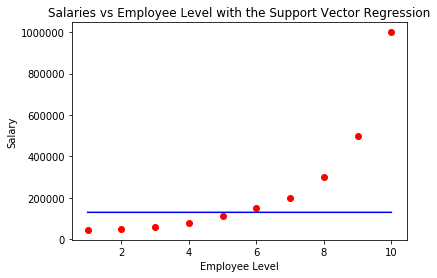

In [16]:
# Visualising the SVR results
plt.scatter(X, y, color="red")
# regression line
plt.plot(X, regressor.predict(X), color = "blue" )
# add a title
plt.title("Salaries vs Employee Level with the Support Vector Regression")
plt.xlabel("Employee Level")
plt.ylabel("Salary")
plt.show()

The graph also doesn't give a promising result.

We would try to scale the features because the SVR model unlike the other common models doesn't take that into account. So we would do this and run it again.

### Feauture Scaling

In [17]:
# Feauture scaling
# 2 methods- standardisation and Normalisation
from sklearn.preprocessing import StandardScaler

In [18]:
sc_X= StandardScaler()
X_scale = sc_X.fit_transform(X)
X_scale

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [20]:
sc_y= StandardScaler()
y_scale = sc_y.fit_transform(y)
y_scale

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [21]:
#Fitting the SVR to the scaled data
from sklearn.svm import SVR
regressor = SVR(kernel = "rbf")
regressor.fit(X_scale,y_scale)

C:\Users\Wale\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
# transform the 7.5 so it suited to the regressor
y_pred = regressor.predict(sc_X.transform(np.array([[7.5]])))
y_pred # scaled prediction

array([0.05014191])

In [26]:
# use the inverse transform to get the original scale of thr salary
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[7.5]]))))
y_pred

array([263740.85328003])

This is a better prediction of the salary since it is close to what the employee claimed he received at his previous work place. 

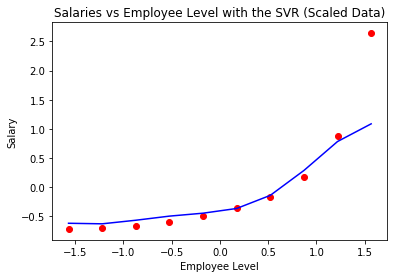

In [23]:
# Visualising the SVR results with the scaled data
plt.scatter(X_scale, y_scale, color="red")
# regression line
plt.plot(X_scale, regressor.predict(X_scale), color = "blue" )
# add a title
plt.title("Salaries vs Employee Level with the SVR (Scaled Data)")
plt.xlabel("Employee Level")
plt.ylabel("Salary")
plt.show()

In conclusion, feature scaling improved the model performance and we found that their is a high probability that the employee wasn't bluffing